In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# read the csv file as a dataframe
df = pd.read_csv('data.csv',sep=';',engine='python')

In [14]:
# visualize data
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

<AxesSubplot: xlabel='Target', ylabel='count'>

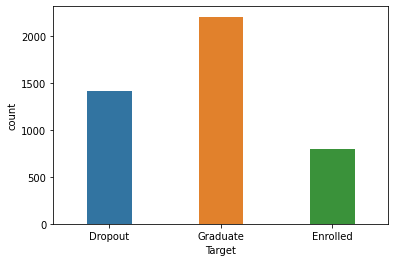

In [16]:
# Explanatory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the data available to each category
sns.countplot(x='Target',data=df,width=0.4)

c:\Users\Gelli Satyanarayana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

c:\Users\Gelli Satyanarayana\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Gelli Satyanarayana\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


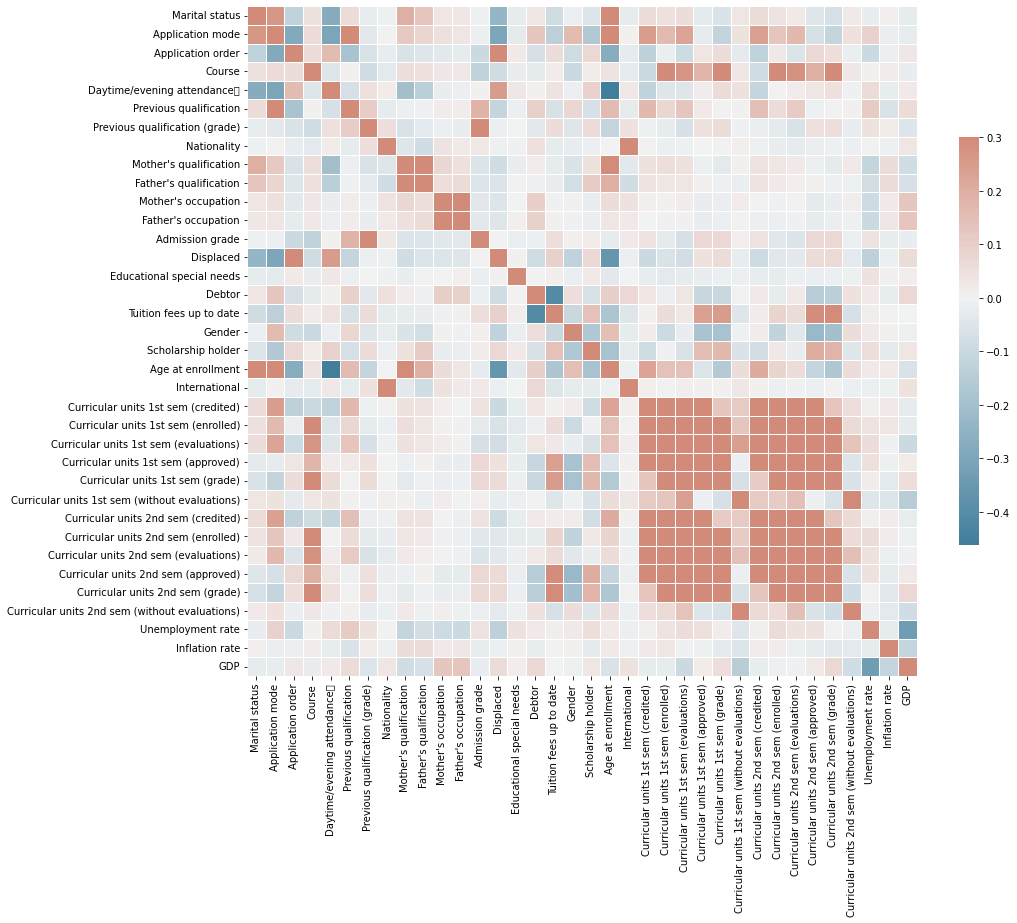

In [17]:
# Plotting a correlation matrix
corr = df.corr()
f = plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=False, cmap=cmap,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot: xlabel='Unemployment rate', ylabel='Count'>

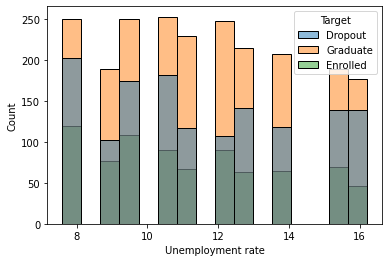

In [18]:
sns.histplot(x='Unemployment rate',data=df,hue='Target')

In [19]:
# getting input and output columns

X = df.drop(columns=['Target'])
y = df['Target']

In [20]:
# Split dataset into training, validation and test sets

from sklearn.model_selection import train_test_split
X_train,X_rem,y_train,y_rem = train_test_split(X,y,shuffle=True,train_size=0.8,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_rem,y_rem,shuffle=True,train_size=0.5,random_state=42)

print("Training Data : {} ".format(X_train.shape[0]))
print("Validation Data : {} ".format(X_val.shape[0]))
print("Testing Data : {} ".format(X_test.shape[0]))

Training Data : 3539 
Validation Data : 442 
Testing Data : 443 


<AxesSubplot: xlabel='Target', ylabel='count'>

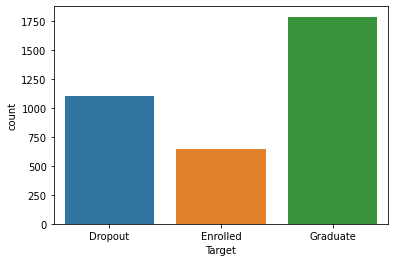

In [21]:
y_train_count = y_train.to_frame(name='Target')
sns.countplot(x='Target',data=y_train_count)

<AxesSubplot: xlabel='Target', ylabel='count'>

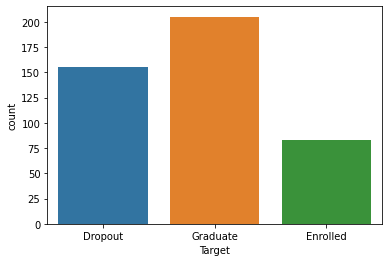

In [22]:
y_test_count = y_test.to_frame(name='Target')
sns.countplot(x='Target',data=y_test_count)

<AxesSubplot: xlabel='Target', ylabel='count'>

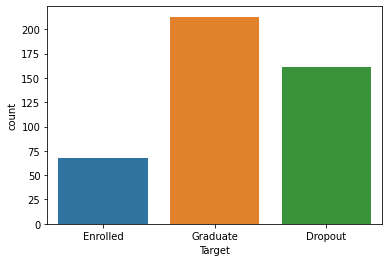

In [23]:
y_val_count = y_val.to_frame(name='Target')
sns.countplot(x='Target',data=y_val_count)

In [24]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [25]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
model = LR.fit(X_train,y_train)

In [26]:
y_pred_LR = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
accuracy_LR = accuracy_score(y_test,y_pred_LR)
report_LR = classification_report(y_test,y_pred_LR)
print('Accuracy Of LogisticRegression Model : ', accuracy_LR)
print()
print(report_LR)

Accuracy :  0.7246049661399548

              precision    recall  f1-score   support

     Dropout       0.87      0.70      0.78       155
    Enrolled       0.49      0.31      0.38        83
    Graduate       0.70      0.91      0.79       205

    accuracy                           0.72       443
   macro avg       0.69      0.64      0.65       443
weighted avg       0.72      0.72      0.71       443



In [32]:
# Further Improvement to Logistic regression
from sklearn.linear_model import LogisticRegressionCV
LR = LogisticRegressionCV(cv=10,solver='liblinear',penalty="l2",max_iter=200)
model = LR.fit(X_train,y_train)

In [33]:
y_pred_LR_CV = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
accuracy_LR_CV = accuracy_score(y_test,y_pred_LR_CV)
report_LR_CV = classification_report(y_test,y_pred_LR_CV)
print('Accuracy of LogisticRegressionCV model : ', accuracy_LR_CV)
print()
print(report_LR_CV)

Accuracy :  0.7313769751693002

              precision    recall  f1-score   support

     Dropout       0.89      0.70      0.79       155
    Enrolled       0.48      0.35      0.41        83
    Graduate       0.71      0.91      0.80       205

    accuracy                           0.73       443
   macro avg       0.70      0.65      0.66       443
weighted avg       0.73      0.73      0.72       443



In [41]:
# K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
report_knn = classification_report(y_test,y_pred_knn)
print('Accuracy Of Decision Tree : ', accuracy_knn)
print()
print(report_knn)

Accuracy Of Decision Tree :  0.6862302483069977

              precision    recall  f1-score   support

     Dropout       0.84      0.66      0.74       155
    Enrolled       0.42      0.30      0.35        83
    Graduate       0.67      0.86      0.76       205

    accuracy                           0.69       443
   macro avg       0.65      0.61      0.62       443
weighted avg       0.68      0.69      0.67       443



In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test,y_pred_dtree)
report_dtree = classification_report(y_test,y_pred_dtree)
print('Accuracy Of Decision Tree : ', accuracy_dtree)
print()
print(report_dtree)

Accuracy Of Decision Tree :  0.672686230248307

              precision    recall  f1-score   support

     Dropout       0.73      0.68      0.71       155
    Enrolled       0.41      0.42      0.41        83
    Graduate       0.74      0.77      0.75       205

    accuracy                           0.67       443
   macro avg       0.63      0.62      0.62       443
weighted avg       0.67      0.67      0.67       443

